# (Ford Gobike Data Visualization)
## by (Omar Reda Hosseny )

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area and explains these rides through information about trip duration ,stations information and users information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
#load in the dataset into a pandas dataframe and print statistics
df= pd.read_csv('E:/p4/201902-fordgobike-tripdata.csv')
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## check for cleanliness

In [55]:
#showing general information about data (data types of columns - counts of each columns values)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

 > According to the results above   
 **1-there are columns with datatypes which    
     not ideal for analyzing data of these coulmns such as:**   
     ***start_time that should be datetime datatype and bike_id that should be object datatype***   
 **2-there are columns with missing data such as member_birth_year and member_gender**    
 as thier counts are less than the count of the dataset.   

In [56]:
#showing statistical information about  numerical data columns (count,mean,std,5number summary)
print(df.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

 > According to the results above   
 **there is column with unlogic values such as member_birth_year in the minimum value of 1878   
     which the age of the member will be over 140 year!**

# information about columns with missing data 

In [57]:
#calculate number of columns with missing data 
number_of_columns_with_missing_data=df.isnull().any().sum()
print("Number of columns with missing data is:\n",number_of_columns_with_missing_data)
#number of missing values in each column
print("Number of missing data in each column is : \n", df.isnull().sum())

Number of columns with missing data is:
 6
Number of missing data in each column is : 
 duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


> According to the results above
 **there are (6)columns with missing data**    
 and the counts of missing data in each one are showen in results above.

# information about duplicate rows in dataset

In [58]:
#calculate duplicate rows in dataset
print("number of duplicated rows is :\n " ,df.duplicated().sum())

number of duplicated rows is :
  0


# checking unique values for columns for  better analyzing 

In [59]:
#number of unique values in each column in our dataset
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

 **next we will focus in (user_type-member_gender-bike_share_for_all_trip)columns   
   and make some checking in thier values**

In [60]:
print(df['user_type'].unique())
print(df['member_gender'].unique())
print(df['bike_share_for_all_trip'].unique())

['Customer' 'Subscriber']
['Male' nan 'Other' 'Female']
['No' 'Yes']


**there are nan values in the column of member gender so we will clean these values in the cleaning section**

### Data Cleaning (1- delete columns which I will not use in the analysis)

In [61]:
df.drop(['end_time','start_station_id','end_station_name','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_longitude','end_station_latitude'],axis=1,inplace=True)
print('Structure of data after deleting columns above is: \n',df.shape)
print(df.info())

Structure of data after deleting columns above is: 
 (183412, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   bike_id                  183412 non-null  int64  
 3   user_type                183412 non-null  object 
 4   member_birth_year        175147 non-null  float64
 5   member_gender            175147 non-null  object 
 6   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 9.8+ MB
None


### Data Cleaning (2-change data types of columns which have incorrect data types)

In [63]:
#change start_time from object to datetime  
df['start_time'] = pd.to_datetime(df['start_time'])
#change bike_id from int to string
df['bike_id'] = df['bike_id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   bike_id                  183412 non-null  object        
 3   user_type                183412 non-null  object        
 4   member_birth_year        175147 non-null  float64       
 5   member_gender            175147 non-null  object        
 6   bike_share_for_all_trip  183412 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 9.8+ MB


### Data Cleaning (3- dealing with columns with missing data)
we will fill missing data in (member gender, member birth year)columns with most common value(mode)   
***as a way to avoid deleting them***              

In [64]:
df['member_gender']=df['member_gender'].fillna(df['member_gender'].mode()[0])
df['member_birth_year']=df['member_birth_year'].fillna(df['member_birth_year'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   bike_id                  183412 non-null  object        
 3   user_type                183412 non-null  object        
 4   member_birth_year        183412 non-null  float64       
 5   member_gender            183412 non-null  object        
 6   bike_share_for_all_trip  183412 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 9.8+ MB


# Creating new columns for better analysis


In [65]:
#1-start_hour column
df['start_hour']=df['start_time'].dt.hour
#2-start_day column
df['start_day']=df['start_time'].dt.day_name()
#3-start_month column
df['start_month']=df['start_time'].dt.month

In [66]:
#calculating max year in start time to use in creating member age column
print(df['start_time'].max())

2019-02-28 23:59:18.548000


In [67]:
#4-calculating member age from birth year
df['member_age']=2019 - df['member_birth_year']
#drop start time and member birth year column because we will not use 
df=df.drop('start_time',axis=1)
df=df.drop('member_birth_year',axis=1)
#showing new columns
print(df.shape)
print(df.info())
df.head()

(183412, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   bike_id                  183412 non-null  object 
 2   user_type                183412 non-null  object 
 3   member_gender            183412 non-null  object 
 4   bike_share_for_all_trip  183412 non-null  object 
 5   start_hour               183412 non-null  int64  
 6   start_day                183412 non-null  object 
 7   start_month              183412 non-null  int64  
 8   member_age               183412 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 12.6+ MB
None


,duration_sec,bike_id,user_type,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,member_age
0,52185,4902,Customer,Male,No,17,Thursday,2,35.0
1,42521,2535,Customer,Male,No,18,Thursday,2,31.0
2,61854,5905,Customer,Male,No,12,Thursday,2,47.0
3,36490,6638,Subscriber,Other,No,17,Thursday,2,30.0
4,1585,4898,Subscriber,Male,Yes,23,Thursday,2,45.0


In [68]:
#convert start day into ordered categorical type
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
days_ordered=pd.api.types.CategoricalDtype(ordered = True,categories=days) 
df['start_day']=df['start_day'].astype(days_ordered)                                                             

### What is the structure of your dataset?

> the dataset contains 183412 trip with 9 features vary from the following :   
1-numeric variables such as duration,start hour and member age       
2-cateogrical variables such as user type,member gender and start day   


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are most affect   
number and duration of the trips in the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that:  
1-start hour     
2-start day   
3-start month  
4-user type   
5-member age   
6-gender   


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by looking at the distribution of the main variable of interest: duration of trip

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

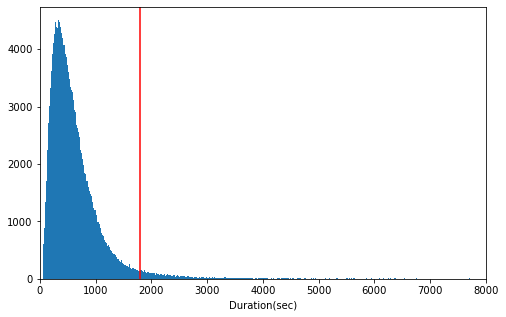

In [71]:
#plot histogram for duration of trip as it is a numeric variable
#so the histogram is the best choice
binsize = 17
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration(sec)')
plt.xlim(0, 8000)
plt.axvline(x=1800, color = "red")
plt.show()

In [73]:
#1-percetage of durations which less than half an hour
print('percetage of durations which less than half an hour is: \n',round((df['duration_sec']<= 1800).mean()*100,1))
#2-percetage of durations which more than one hour
print('percetage of durations which more than one hour is: \n',round((df['duration_sec']> 3600).mean()*100,1))

percetage of durations which less than half an hour is: 
 96.3
percetage of durations which more than one hour is: 
 0.9


>1-duration of trip has a right skewed distribution so the duration of the             trips is increased    
 2-most of trip duration is less than 1800 seconds (half an hour) with 96.3%      
 3-there are too few trips which durations are more than 3600 seconds(1hour)            with 0.9%       
   so there are outliers should be removed for better analysis 

In [75]:
#keep only trips which less or equal one hour
df2=df[df['duration_sec']<=3600]
df2.shape

(181702, 9)

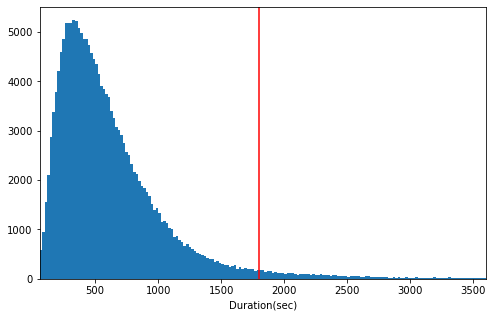

In [76]:
#replot the histogram afte deleting outliers
binsize = 20
bins = np.arange(0, df2['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df2, x = 'duration_sec', bins = bins)
plt.xlabel('Duration(sec)')
plt.xlim(60, 3600)
plt.axvline(x=1800, color = "red")
plt.show()

>1-duration of trip has a right skewed distribution so the duration of the             trips is increased    
 2-most of trips durations are less than 1800 seconds (half an hour)       


Next up,we will look at the second numeric variable member age and see its distribution

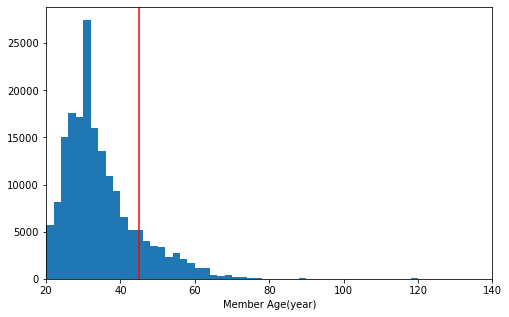

In [77]:
#plot histogram for member age as it is a numeric variable
binsize =2
bins = np.arange(0, df['member_age'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_age', bins = bins)
plt.xlabel('Member Age(year)')
plt.xlim(20, 140)
plt.axvline(x=45, color = "red")
plt.show()

In [78]:
#percetage of ages  which less than or equal 45 years old
print('percetage of ages  which less than or equal 45 years old is: \n',round((df2['member_age']<=45).mean()*100,1))
#percetage of ages  which more than  80 years old
print('percetage of ages  which more than  80 years old is: \n',round((df2['member_age']>80).mean()*100,1))

percetage of ages  which less than or equal 45 years old is: 
 87.0
percetage of ages  which more than  80 years old is: 
 0.1


the distribution of age is right skewed and most ages are 
between 20 and 45 years old   
the most of our population are not retired yet and they are in work or still study   
they represent precentage of 87% of all members in our dataset   
there are outliers such as age of 141 years

In [80]:
#keep only members with ages less than or equal 80 years
#because they represent a too small percentage of our population with 0.1%
df3=df2[df2["member_age"]<=80]
df3.shape

(181510, 9)

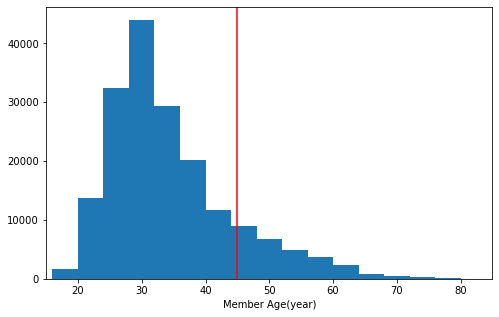

In [82]:
#replot the histogram after removing outliers
binsize =4
bins = np.arange(0, df3['member_age'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df3, x = 'member_age', bins = bins)
plt.xlabel('Member Age(year)')
plt.xlim(15,85)
plt.axvline(x=45, color = "red")
plt.show()

the distribution of age is right skewed and most ages are 
between 20 and 45 years old   
the most of our population are not retired yet and they are in work or still study   


I'll now move on to the datetime variables in the dataset:start_hour, start_day and start_month.

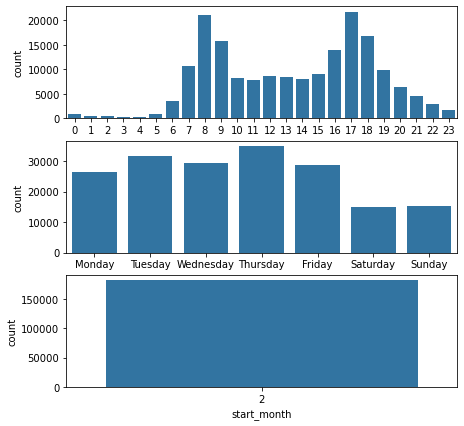

In [26]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows=3, figsize = [7,7])
default_color = sb.color_palette()[0]
sb.countplot(data = df3, x = 'start_hour', color = default_color, ax = ax[0])
sb.countplot(data = df3, x = 'start_day', color = default_color, ax = ax[1])
sb.countplot(data = df3, x = 'start_month', color = default_color, ax = ax[2])

plt.show()

most of trips occur in 8 am and 5 pm and this looks normal as the trips numner increase while peole go to thier work or school and go back from these places.  

the highest number of trips occurs in days of work in the week such as thursday 
and the number decreases in weekend days such as saturday and sunday.

our trips takeplace only in february so start month have no variation and will not be useful for our analysis for trips number and duration


finally in the univariate exploration I will look at the categorical variables  in the dataset

for better analysis I will divide ages into 3 categories   
***youth,adults and seniors***   
for better analysis I will divide day based on start hours into 4 categories   ***morning,afternoon,evening and night***


In [83]:
#to determine bins edges for ages
df3['member_age'].describe()

count    181510.000000
mean         33.979781
std           9.674575
min          18.000000
25%          27.000000
50%          31.000000
75%          38.000000
max          80.000000
Name: member_age, dtype: float64

In [84]:
#Bin edges that will be used to cut our dataset into groups
bin_edges=[18,27,60,78]
# Labels for the three age buckets in our dataset
bin_names=['Youth','Adults','Seniors']
#create age bucketscolumn 
df3['age_buckets']= pd.cut(df3['member_age'], bin_edges, labels=bin_names)
#check for successful of creating age buckets column
df3.head(5)

<ipython-input-84-c21b953b78e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age_buckets']= pd.cut(df3['member_age'], bin_edges, labels=bin_names)


,duration_sec,bike_id,user_type,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,member_age,age_buckets
4,1585,4898,Subscriber,Male,Yes,23,Thursday,2,45.0,Adults
5,1793,5200,Subscriber,Male,No,23,Thursday,2,60.0,Adults
6,1147,3803,Subscriber,Female,No,23,Thursday,2,36.0,Adults
7,1615,6329,Subscriber,Male,No,23,Thursday,2,30.0,Adults
8,1570,6548,Subscriber,Other,No,23,Thursday,2,31.0,Adults


In [89]:
#Bin edges that will be used to cut our dataset into groups
#value of (-1) to ensure including 0(12 am)hour included in the groups
bin_edges=[-1,5,12,18,23]
# Labels for the four day parts in our dataset
bin_names=['Night','Morning','Afternoon','Evening']
#create day parts column 
df3['day_parts']= pd.cut(df3['start_hour'], bin_edges, labels=bin_names)
#check for successful of creating day parts column
df3.tail()

<ipython-input-89-7c0ae5e6f075>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['day_parts']= pd.cut(df3['start_hour'], bin_edges, labels=bin_names)


,duration_sec,bike_id,user_type,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,member_age,age_buckets,day_parts
183407,480,4832,Subscriber,Male,No,0,Friday,2,23.0,Youth,Night
183408,313,4960,Subscriber,Male,No,0,Friday,2,35.0,Adults,Night
183409,141,3824,Subscriber,Male,Yes,0,Friday,2,29.0,Adults,Night
183410,139,5095,Subscriber,Male,No,0,Friday,2,31.0,Adults,Night
183411,271,1057,Subscriber,Male,No,0,Friday,2,30.0,Adults,Night


In [90]:
#convert age_buckets and day_parts into ordered categorical types
var_dict = {'age_buckets': ['Youth','Adults','Seniors'],
            'day_parts': ['Morning', 'Afternoon', 'Evening', 'Night']}
                   

for col in var_dict:
    ordered_col = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[col])                              
    df3[col] = df3[col].astype(ordered_col)

<ipython-input-90-e682532b8618>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = df3[col].astype(ordered_col)


 I will look at the categorical variable user type in the dataset

Subscriber    89.6
Customer      10.4
Name: user_type, dtype: float64


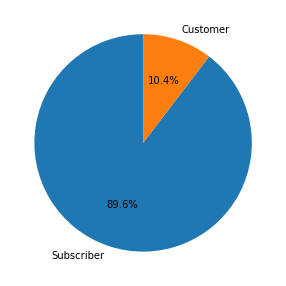

In [91]:
#plot pie chart for user type as it is a cateogrical variable with only 2 values
user_counts= df3['user_type'].value_counts()
print(round(user_counts/df3.shape[0],3)*100)
labels ='Subscriber','Customer'
sizes=user_counts/df3.shape[0]
fig1,ax1 = plt.subplots(figsize = [5,5])
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90)    
plt.show()

most of trips are made by  subscriber members with percentage of 89.6%   
while customers made only 10.4% of all trips  



I will look at the categorical variable member gender in the dataset

Male      75.76
Female    22.27
Other      1.97
Name: member_gender, dtype: float64


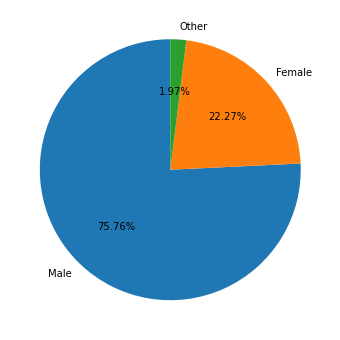

In [92]:
#plot pie chart for member gender as it is a cateogrical variable with only 3 values
gender_counts= df3['member_gender'].value_counts()
print(round(gender_counts/df3.shape[0],4)*100)
labels ='Male','Female','Other'
sizes=gender_counts/df3.shape[0]
fig1,ax1 = plt.subplots(figsize = [6,6])
ax1.pie(sizes,labels=labels, autopct='%1.2f%%', startangle=90) 
plt.show()

most of trips are made by  males members with percentage of 75.76%      
while females made  22.27% of all trips and others made only 1.97% of all trips

I will look at the categorical variable age buckets in the dataset

Adults     71.8
Youth      26.4
Seniors     1.8
Name: age_buckets, dtype: float64


<ipython-input-99-aaa8eeb37a8a>:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90)


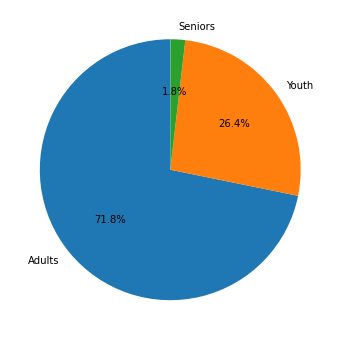

In [99]:
#plot pie chart for age buckets as it is a cateogrical variable with only 3 values
age_buckets_counts= df3['age_buckets'].value_counts()
print(round(age_buckets_counts/df3.shape[0],3)*100)
labels ='Adults','Youth','Seniors'
sizes=age_buckets_counts/df3.shape[0]
fig1,ax1 = plt.subplots(figsize = [6,6])
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90) 
plt.show()

most of trips are made by adults which ages between(27-60) with percentage of 71.8%      
while youth which ages between(18-26) made 26.4% of all trips   
and seniors which ages more than 60 years old only made 1.8% of all trips

I will look at the last categorical variable in my analysis day parts in the dataset

<AxesSubplot:xlabel='day_parts', ylabel='count'>

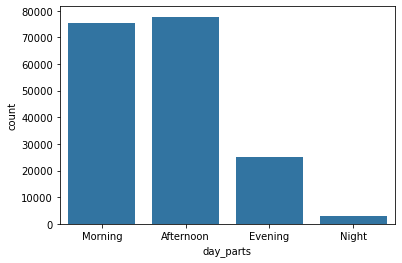

In [100]:
default_color = sb.color_palette()[0]
sb.countplot(data = df3, x = 'day_parts', color = default_color)

most of our trips are made in morning(6 am - 12 pm) and afternoon(1 pm-6 pm)  
as they the parts of day which people go and leave thier work and schools   
 a few number of trips made at night part (12 am-5 am)as people go to sleep 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>1-duration of trip has a right skewed distribution so the duration of the             trips is increased    
 2-most of trip duration is less than 1800 seconds (half an hour) with 96.3%      
 3-there are too few trips which durations are more than 3600 seconds(one hour)            with 0.9%       
   ***so there are outliers which are trips more than one hour***    
 4- I do not any transformtion

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>1- I deal with missing data in columns of member gender and birth yeal by         filling them with the mode to avoid delete them

>2-I change the data type of start time to be a datetime for better analysis to    show effect of time change in number and duration of trips on hours , days      and months levels so I add 3 columns for them to the data

>3-I add 2 columns to data one for age buckets to show change in number of        trips based on ages in the aggregate level   
  the other for parts of day to show change in number of trips based on hour in   the aggregate level   

>4-the conclusion from the univariate exploration :-

  >a-the distribution of age is right skewed and most ages are between 20 and     45  years old there are outliers such as age of 141 years old      
  so I remove ages which more than 80 years old as they only represent .1% for   better analysis                                                                          

  >b-most of trips occur in 8 am and 5 pm and this looks normal as the trips     numner increase while people go to thier work or school and go back from       these places.                                                                          

  >c-the highest number of trips occurs in days of work in the week such as       thursday and the number of trips decreases in weekend days such as saturday     andsunday.                                                                        
  >d-our trips takeplace only in february so start month have no variation and    will not be useful for our analysis for trips number and duration                    

  >e-most of trips are made by subscriber members with percentage of 89.6%   
   while customers made only 10.4% of all trips                                     

  >f-most of trips are made by  males members with percentage of 75.76%      
   while females made  22.27% of all trips and others made only 1.97% of trips 

  >g-most of trips are made by adults which ages between(27-60) with percentage    of 75.76% while youth which ages between(18-26) made 26.4% of all trips     
   and eniors which ages more than 60 years old only made 1.8% of all trips
   
   
 >h-most of our trips are made in morning(6 am-12 pm) and afternoon(1 pm-6 pm)
   as they the parts of day which people go and leave thier work and schools   
   a few number of trips made at night part (12 am-5 am)as people go to sleep. 
   

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

To start off I will look at the pairwise correlations present between features in the data.

In [33]:
numeric_vars = ['duration_sec', 'start_hour','member_age']
categoric_vars = ['user_type','member_gender','start_day','day_parts','age_buckets']

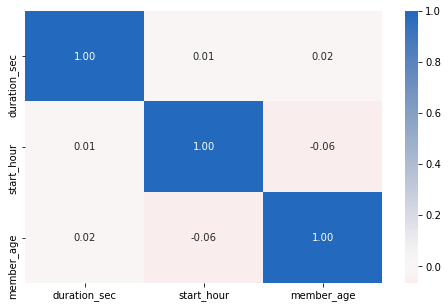

In [34]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df3[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

the numeric variable has a week relationship with our variable of interest 

Let's move on to looking at how duration correlate with the categorical variables    
with first member gender

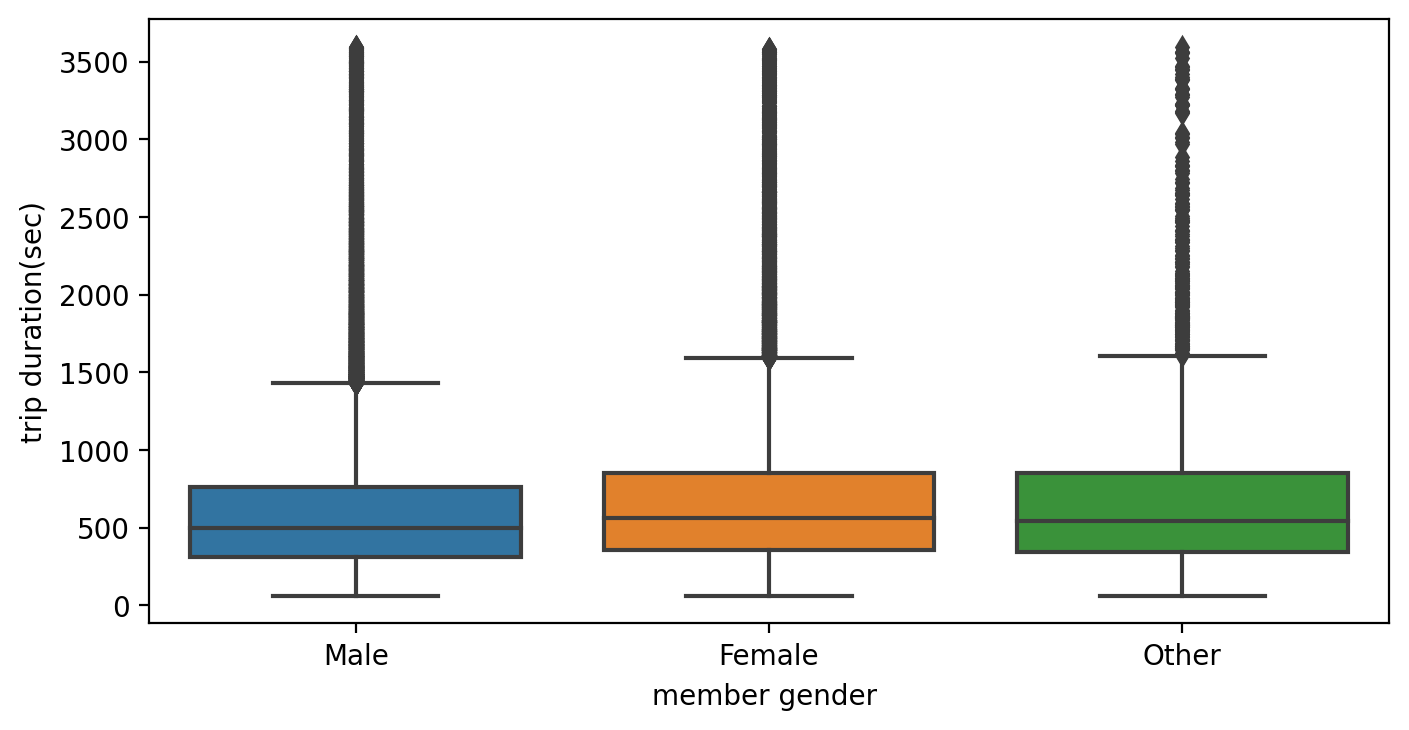

In [119]:
plt.figure(figsize = (8,4), dpi = 200)

sb.boxplot(data = df3, x = "member_gender", y = "duration_sec")
plt.xlabel('member gender ');
plt.ylabel('trip duration(sec)');
plt.show()

males make faster trips than females and others so the average trip duration of males is less than females and others    
although the males have made the most trips as discussed in univariate exploration

now we looking at how duration correlate with user type variable

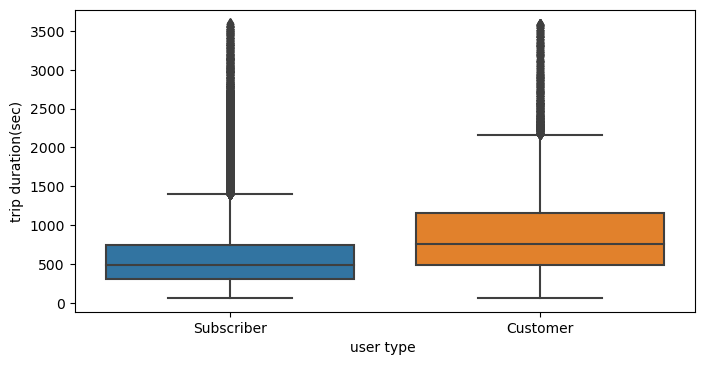

In [121]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df3, x = "user_type", y = "duration_sec")
plt.xlabel('user type ');
plt.ylabel('trip duration(sec)');
plt.show()

customers making long trips than subscribers as they make a trip for a special task   
although subscribers have made the most trips as discussed in univariate exploration

now we looking at how duration correlate with day of week variable

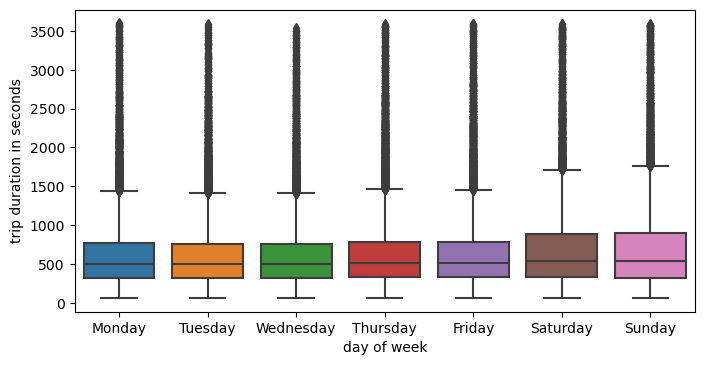

In [37]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df3, x = "start_day", y = "duration_sec")
plt.xlabel('day of week');
plt.ylabel('trip duration in seconds');
plt.show()

long trips occur in weekend days such as saturday and sunday as people go for entertainment
although most trips occur in work days such as thursday as discussed in univariate exploration

now we looking at how duration correlate with parts of day variable

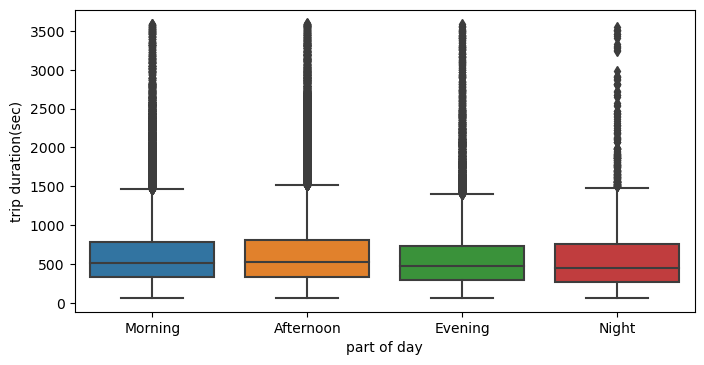

In [126]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df3, x = 'day_parts', y = "duration_sec")
plt.xlabel('part of day');
plt.ylabel('trip duration(sec)');
plt.show()

long trips occur in morning and afternoon part of day as people go and back from thier work and school     
and most trips occur in win morning and afternoon part of day as discussed in univariate exploration

now we looking at how duration correlate with age buckets variable

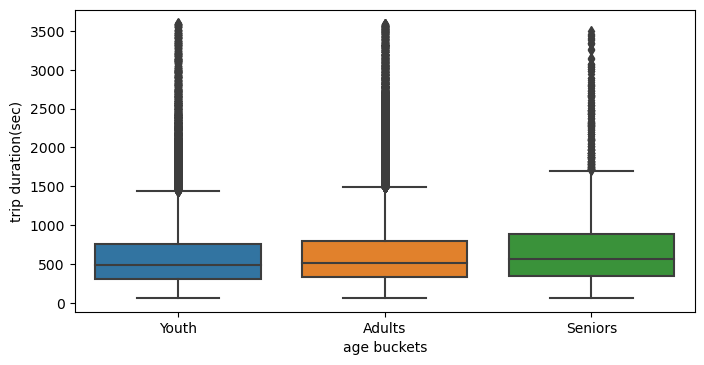

In [128]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df3, x = "age_buckets", y = "duration_sec")
plt.xlabel('age buckets');
plt.ylabel('trip duration(sec)');
plt.show()

long trips are made by seniors then adults and shortest trips made by youth   
as the level of fittness of youth is higher than adults and seniors       
although most trips are made by adults as discussed in univariate exploration

Finally let's look at relationships between the three categorical features

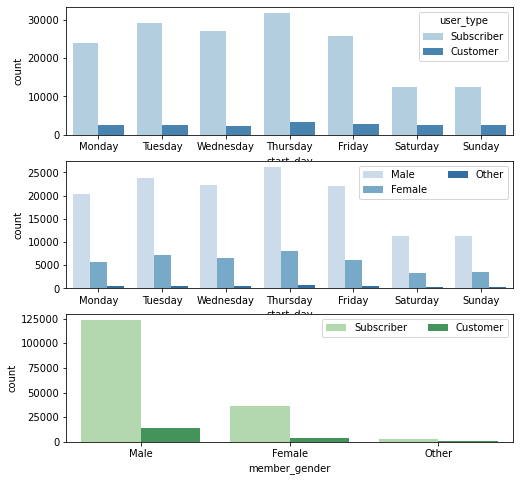

In [40]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: day of week vs user type
plt.subplot(3, 1, 1)
sb.countplot(data= df3, x = 'start_day', hue = 'user_type', palette = 'Blues')

# subplot 2: day of week vs member gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data= df3, x = 'start_day', hue = 'member_gender', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: member gender vs user type, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data= df3, x = 'member_gender', hue = 'user_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 
plt.show()

most of trips are made by subscribers in all day of week    
most of trips are made by males in all day of week   
the most of genders are subscribers members    

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>1-there is a relationship between trip duration(feature of interest)and             gender     
    males make faster trips than females and others so the average trip             duration of males is less than females and others
    
 >2-there is a relationship between trip duration(feature of interest)and             user type   
    customers making long trips than subscribers as they make a trip for a         special task
 >3-there is a relationship between trip duration(feature of interest)and day    of week   
    long trips occur in weekend days such as saturday and sunday as people go       for entertainment   
    
  >4-there is a relationship between trip duration(feature of interest)and part of day 
     long trips occur in morning and afternoon part of day as people go and back from thier work and school
     
  >5-there is a relationship between trip duration(feature of interest)and age buckets long trips are made by seniors then adults and shortest trips made by youth
as the level of fittness of youth is higher than adults and seniors


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> there is a relationship between categorical variables such as   
  1-most of trips are made by subscribers in all day of week   
2-most of trips are made by males in all day of week   
3-the most of genders are subscribers members   

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

first I will look the effect of day parts accorrding to user type on the trip duration

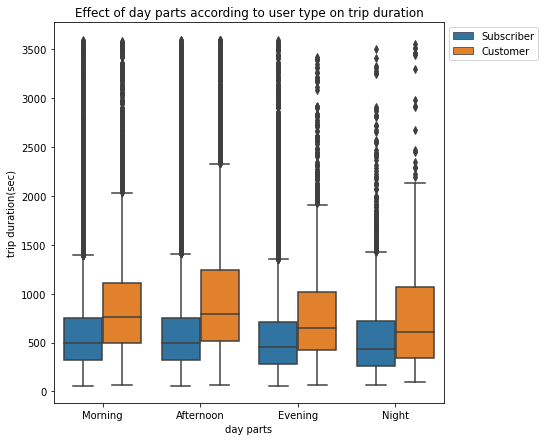

In [166]:
plt.figure(figsize = (7,7))
sb.boxplot(data = df3, x = "day_parts", y = "duration_sec", hue='user_type')
plt.xlabel('day parts');
plt.ylabel('trip duration(sec)')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title("Effect of day parts according to user type on trip duration")

plt.show()

we found that long trips occur in morning and afternoon part of the day    
and trip duration for customer are more than subscriber member for all parts of day

now I am looking at the effect of age buckets according to gender on the trip duration

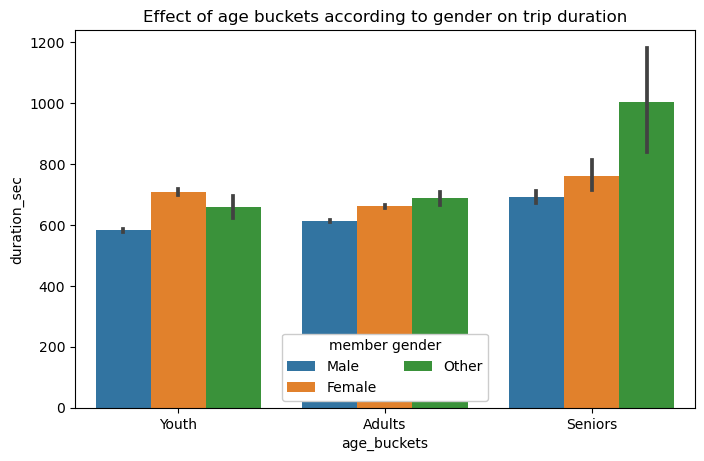

In [170]:
plt.figure(figsize = (8,5), dpi = 100)
ax = sb.barplot(data = df3, x = 'age_buckets', y = 'duration_sec', hue = 'member_gender')
ax.legend(loc = 8, ncol = 2, framealpha = 1, title = 'member gender')
plt.title("Effect of age buckets according to gender on trip duration");

we found that for all age buckets males make the faster trips     
and other make the slowest trips    
except for youth females make the slowest trips

finally I am looking at the effect of day of week according to age buckets on the trip duration

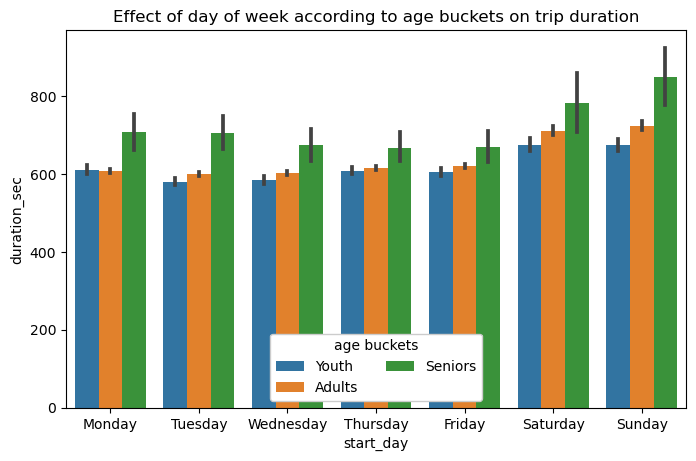

In [169]:
plt.figure(figsize = (8,5), dpi = 100)
ax = sb.barplot(data = df3, x = 'start_day', y = 'duration_sec', hue = 'age_buckets')
ax.legend(loc = 8, ncol = 2, framealpha = 1, title = 'age buckets')
plt.title("Effect of day of week according to age buckets on trip duration");

we found that long trips occur at the weekend days such as saturday and sunday   
and for most days  youth trips are faster and adults make slower trips
while seniors make the slowest trips    
except monday and thursday trips duration of adults and youth are close to each other


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>1-there is a relationship between trip duration(feature of interest)and             day parts accorrding to user type     
    long trips occur in morning and afternoon part of the day    
and trip duration for customer are more than subscriber member for all parts of day

>2-there is a relationship between trip duration(feature of interest)and age buckets according to gender   
for all age buckets males make the faster trips     
and other make the slowest trips    
except for youth females make the slowest trips

>3-there is a relationship between trip duration(feature of interest)and day of week according to age buckets
long trips occur at the weekend days such as saturday and sunday   
and for most days  youth trips are faster and adults make slower trips
while seniors make the slowest trips    
except monday and thursday trips duration of adults and youth are close to each other


### Were there any interesting or surprising interactions between features?

>  there's a interesting or surprising interaction between features such as :  
day parts and user type on trip duration
if we look at the effect of each other a lone we notice that
for day parts morning and afternoon have the long trips in all day parts
for user type customer have the long trips 
finally when we look at the effect of the two of them on trips duration 
***we notice that :***   
long trips occur in morning and afternoon part of the day    
and trip duration for customer are longer than subscriber member
***but the trip duration in morning and afternoon longer than other parts of day for customer***  

